In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
try:
  import torchmetrics as torchm
except:
  ! pip install torchmetrics
  import torchmetrics as torchm

from helper_functions import plot_decision_boundary

In [2]:
def tanh(x):
  nominator = torch.exp(x) - torch.exp(-x)
  denominator = torch.exp(x) + torch.exp(-x)
  return nominator/denominator

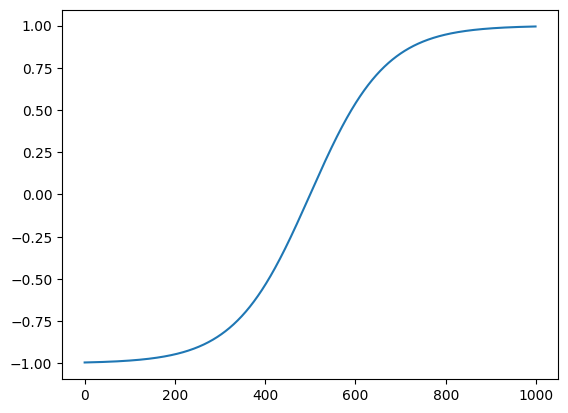

In [3]:
x = torch.linspace(start = -3,end = 3,steps = 1000)
plt.plot(tanh(x))

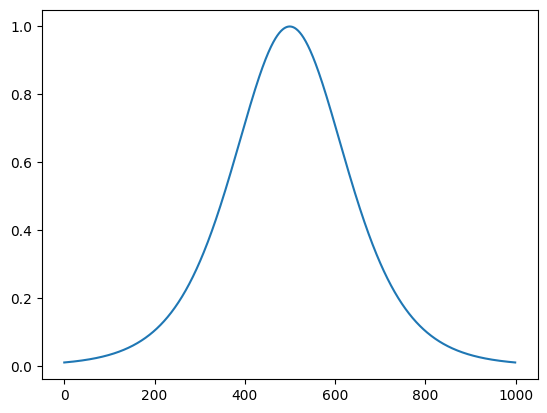

In [4]:
plt.plot(1-(tanh(x)**2))

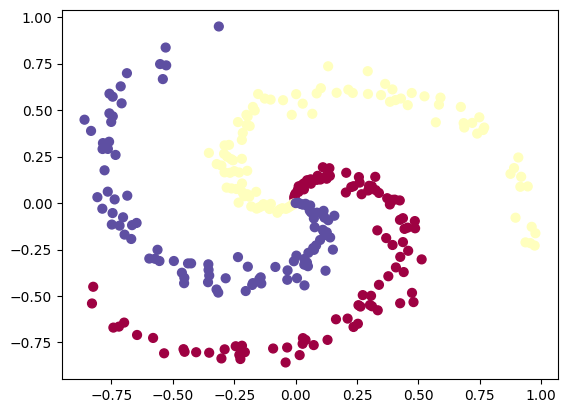

In [5]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [6]:
X.shape, y.shape

((300, 2), (300,))

In [7]:
X[:10], y[:10]

(array([[ 0.        ,  0.        ],
        [ 0.00102289,  0.01004908],
        [-0.00405898,  0.01979006],
        [-0.00584008,  0.02973495],
        [-0.0038114 ,  0.04022387],
        [-0.00076816,  0.05049921],
        [ 0.01137471,  0.05952907],
        [ 0.00885886,  0.07014991],
        [ 0.03362333,  0.07348073],
        [ 0.01228938,  0.0900746 ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8))

In [8]:
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.LongTensor)

In [9]:
X[:10], y[:10]

(tensor([[ 0.0000,  0.0000],
         [ 0.0010,  0.0100],
         [-0.0041,  0.0198],
         [-0.0058,  0.0297],
         [-0.0038,  0.0402],
         [-0.0008,  0.0505],
         [ 0.0114,  0.0595],
         [ 0.0089,  0.0701],
         [ 0.0336,  0.0735],
         [ 0.0123,  0.0901]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
class SpiralModelV0(nn.Module):
  def __init__(self, in_features, out_features, hidden_layer = 10):
    super().__init__()

    self.linear_stack = nn.Sequential(
        nn.Linear(in_features, hidden_layer),
        nn.ReLU(),
        nn.Linear(hidden_layer, hidden_layer),
        nn.ReLU(),
        nn.Linear(hidden_layer, hidden_layer),
        nn.ReLU(),
        nn.Linear(hidden_layer, out_features)
    )
  def forward(self, X:torch.tensor) -> torch.tensor:
    return self.linear_stack(X)

In [14]:
model = SpiralModelV0(in_features = 2, out_features = 3).to(device)
model.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[-0.1120,  0.4730],
                      [ 0.3518,  0.3643],
                      [ 0.5439, -0.0778],
                      [-0.1781,  0.0037],
                      [-0.3680,  0.3137],
                      [ 0.5461, -0.5525],
                      [ 0.6378, -0.6073],
                      [-0.6452,  0.6308],
                      [ 0.1843, -0.1798],
                      [ 0.3684, -0.5723]], device='cuda:0')),
             ('linear_stack.0.bias',
              tensor([ 0.4554,  0.3950,  0.0183,  0.1994,  0.6684, -0.0997,  0.3305, -0.3208,
                      -0.0193,  0.6543], device='cuda:0')),
             ('linear_stack.2.weight',
              tensor([[ 0.0847,  0.2465, -0.2416, -0.2099, -0.2900, -0.1681, -0.2730,  0.0235,
                        0.2700,  0.3128],
                      [ 0.2339, -0.0865, -0.2058, -0.1908,  0.1355,  0.0864, -0.2900, -0.1662,
                       -0.3103, -0.1248],
                 

In [15]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model.parameters(), lr = 1e-2)

In [16]:
acc_fn = torchm.F1Score(task = 'multiclass', num_classes = 3).to(device)

In [17]:
y_logits = model(X_train.to(device))

In [18]:
y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
y_pred

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       device='cuda:0')

In [19]:
loss_fn(y_logits, y_train.to(device)).to(device)

tensor(1.1062, device='cuda:0', grad_fn=<NllLossBackward0>)

In [20]:
acc_fn(y_pred, y_train.to(device)) * 100

tensor(32.5000, device='cuda:0')

> Bulid the training Loop

In [21]:
torch.manual_seed(42)

epochs = 200

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model.train()

  y_logits = model(X_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_train)
  f1_acc = acc_fn(y_pred, y_train).item() * 100

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model(X_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_test)
    test_f1_acc = acc_fn(test_pred, y_test).item() * 100

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {f1_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_f1_acc:.2f}%")

Epoch: 0 | Loss: 1.10616, Acc: 32.50% | Test Loss: 1.08990, Test Acc: 36.67%
Epoch: 10 | Loss: 1.06618, Acc: 49.17% | Test Loss: 1.06804, Test Acc: 51.67%
Epoch: 20 | Loss: 0.98581, Acc: 54.17% | Test Loss: 0.99505, Test Acc: 48.33%
Epoch: 30 | Loss: 0.81447, Acc: 60.00% | Test Loss: 0.83599, Test Acc: 48.33%
Epoch: 40 | Loss: 0.60871, Acc: 68.33% | Test Loss: 0.65230, Test Acc: 60.00%
Epoch: 50 | Loss: 0.48361, Acc: 72.50% | Test Loss: 0.58330, Test Acc: 61.67%
Epoch: 60 | Loss: 0.38385, Acc: 83.33% | Test Loss: 0.48705, Test Acc: 78.33%
Epoch: 70 | Loss: 0.30348, Acc: 89.58% | Test Loss: 0.38388, Test Acc: 83.33%
Epoch: 80 | Loss: 0.23685, Acc: 90.83% | Test Loss: 0.31174, Test Acc: 88.33%
Epoch: 90 | Loss: 0.18676, Acc: 93.75% | Test Loss: 0.24519, Test Acc: 93.33%
Epoch: 100 | Loss: 0.14808, Acc: 95.42% | Test Loss: 0.19988, Test Acc: 93.33%
Epoch: 110 | Loss: 0.11765, Acc: 96.67% | Test Loss: 0.16523, Test Acc: 95.00%
Epoch: 120 | Loss: 0.09448, Acc: 97.50% | Test Loss: 0.13713, T

In [22]:
model.eval()

with torch.inference_mode():
  y_logits = model(X_train)

y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

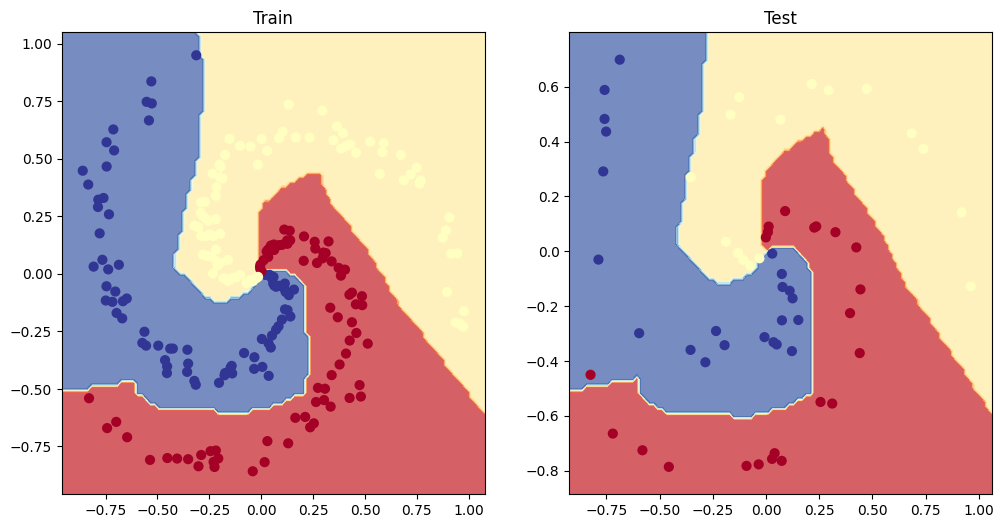

In [23]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

In [24]:
from pathlib import Path

MODEL_PATH = Path("/content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_spiral_best_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: /content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/models/02_spiral_best_model.pth
